[[-40.96  10.24   0.   ...   0.     0.     0.  ]
 [ 10.24 -40.96  10.24 ...   0.     0.     0.  ]
 [  0.    10.24 -40.96 ...   0.     0.     0.  ]
 ...
 [  0.     0.     0.   ... -40.96  10.24   0.  ]
 [  0.     0.     0.   ...  10.24 -40.96  10.24]
 [  0.     0.     0.   ...   0.    10.24 -40.96]]
(4096, 4096)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0.  1.6 0.  ... 0.  0.  0. ]
[-1.6  0.   1.6 ...  0.   0.   0. ]
[[ 0.   1.6  0.  ...  0.   0.   0. ]
 [-1.6  0.   1.6 ...  0.   0.   0. ]
 [ 0.  -1.6  0.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  0.   1.6  0. ]
 [ 0.   0.   0.  ... -1.6  0.   1.6]
 [ 0.   0.   0.  ...  0.  -1.6  0. ]]


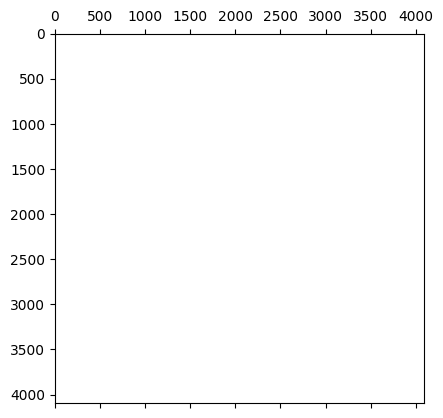

In [1]:
import numpy as np
from scipy.sparse import spdiags
import matplotlib.pyplot as plt

# Define parameters
m = 64
n = m * m # N value in x and y directions
x_min, x_max = -10, 10
dx = (x_max - x_min) / m

# total size of matrix
e0 = np.zeros(n) # vector of zeros
e1 = np.ones(n) # vector of ones
e2 = np.copy(e1) # copy the one vector
e4 = np.copy(e0) # copy the zero vector

for j in range(1, m+1):
    e2[m*j-1] = 0 # overwrite every m^th value with zero
    e4[m*j-1] = 1 # overwirte every m^th value with one

# Shift to correct positions
e3 = np.zeros_like(e2)
e3[1:n] = e2[0:n-1]
e3[0] = e2[n-1]
e5 = np.zeros_like(e4)
e5[1:n] = e4[0:n-1]
e5[0] = e4[n-1]

# Place diagonal elements
diagonals = [e1.flatten(), e1.flatten(), e5.flatten(),e2.flatten(),-4*e1.flatten(), e3.flatten(),e4.flatten(), e1.flatten(), e1.flatten()]
offsets = [-(n-m), -m, -m+1, -1, 0, 1, m-1, m, (n-m)]
A = spdiags(diagonals, offsets, n, n).toarray()
A = A/(dx**2)

print(A)
print(A.shape)

# Create matrix B
e = np.ones(n)

data_B = [e, -1*e, e, -1*e]
offsets_B = [-(n-m), -m, m, (n - m)]
B = spdiags(data_B, offsets_B, n, n).toarray()
B = B/(2*dx)
print(B)

# Create matrix C
e1 = np.zeros(n)
e2 = np.ones(n)
e3 = np.ones(n)
e4 = np.zeros(n)


for i in range(n):
    if (i + 1) % m == 1:
        e1[i] = 1
        e3[i] = 0
    if (i + 1) % m == 0:
        e2[i] = 0
        e4[i] = 1

e2 = -1*e2
e4 = -1*e4

C = spdiags([e1,e2, e3,e4],[-m+1, -1,1,m-1], n,n).toarray()
C = C/(2*dx)
            
print(C[0,:])
print(C[1,:])
plt.spy(C)
print(C)

[2.50656748e-46 1.17762859e-43 4.55107657e-41 ... 1.96785570e-38
 6.19028421e-41 1.60178709e-43]
[[2.50656748e-46 1.17762859e-43 4.55107657e-41 ... 1.96785570e-38
  6.19028421e-41 1.60178709e-43]
 [3.54964961e-45 6.53319004e-43 1.92934361e-40 ... 1.23357409e-37
  5.33777602e-40 1.99380943e-42]
 [1.85768096e-44 2.62245678e-42 6.43507373e-40 ... 5.47591944e-37
  2.93883953e-39 1.41671738e-41]
 ...
 [1.85272739e-42 1.58946594e-40 2.49607447e-38 ... 4.35250271e-35
  3.67992748e-37 2.79962856e-39]
 [4.67439366e-42 3.56498221e-40 5.08478333e-38 ... 1.02347073e-34
  9.45792605e-37 7.95937714e-39]
 [1.11058944e-41 7.46793534e-40 9.69634778e-38 ... 2.23043626e-34
  2.23822117e-36 2.07748843e-38]]
(9, 4096)


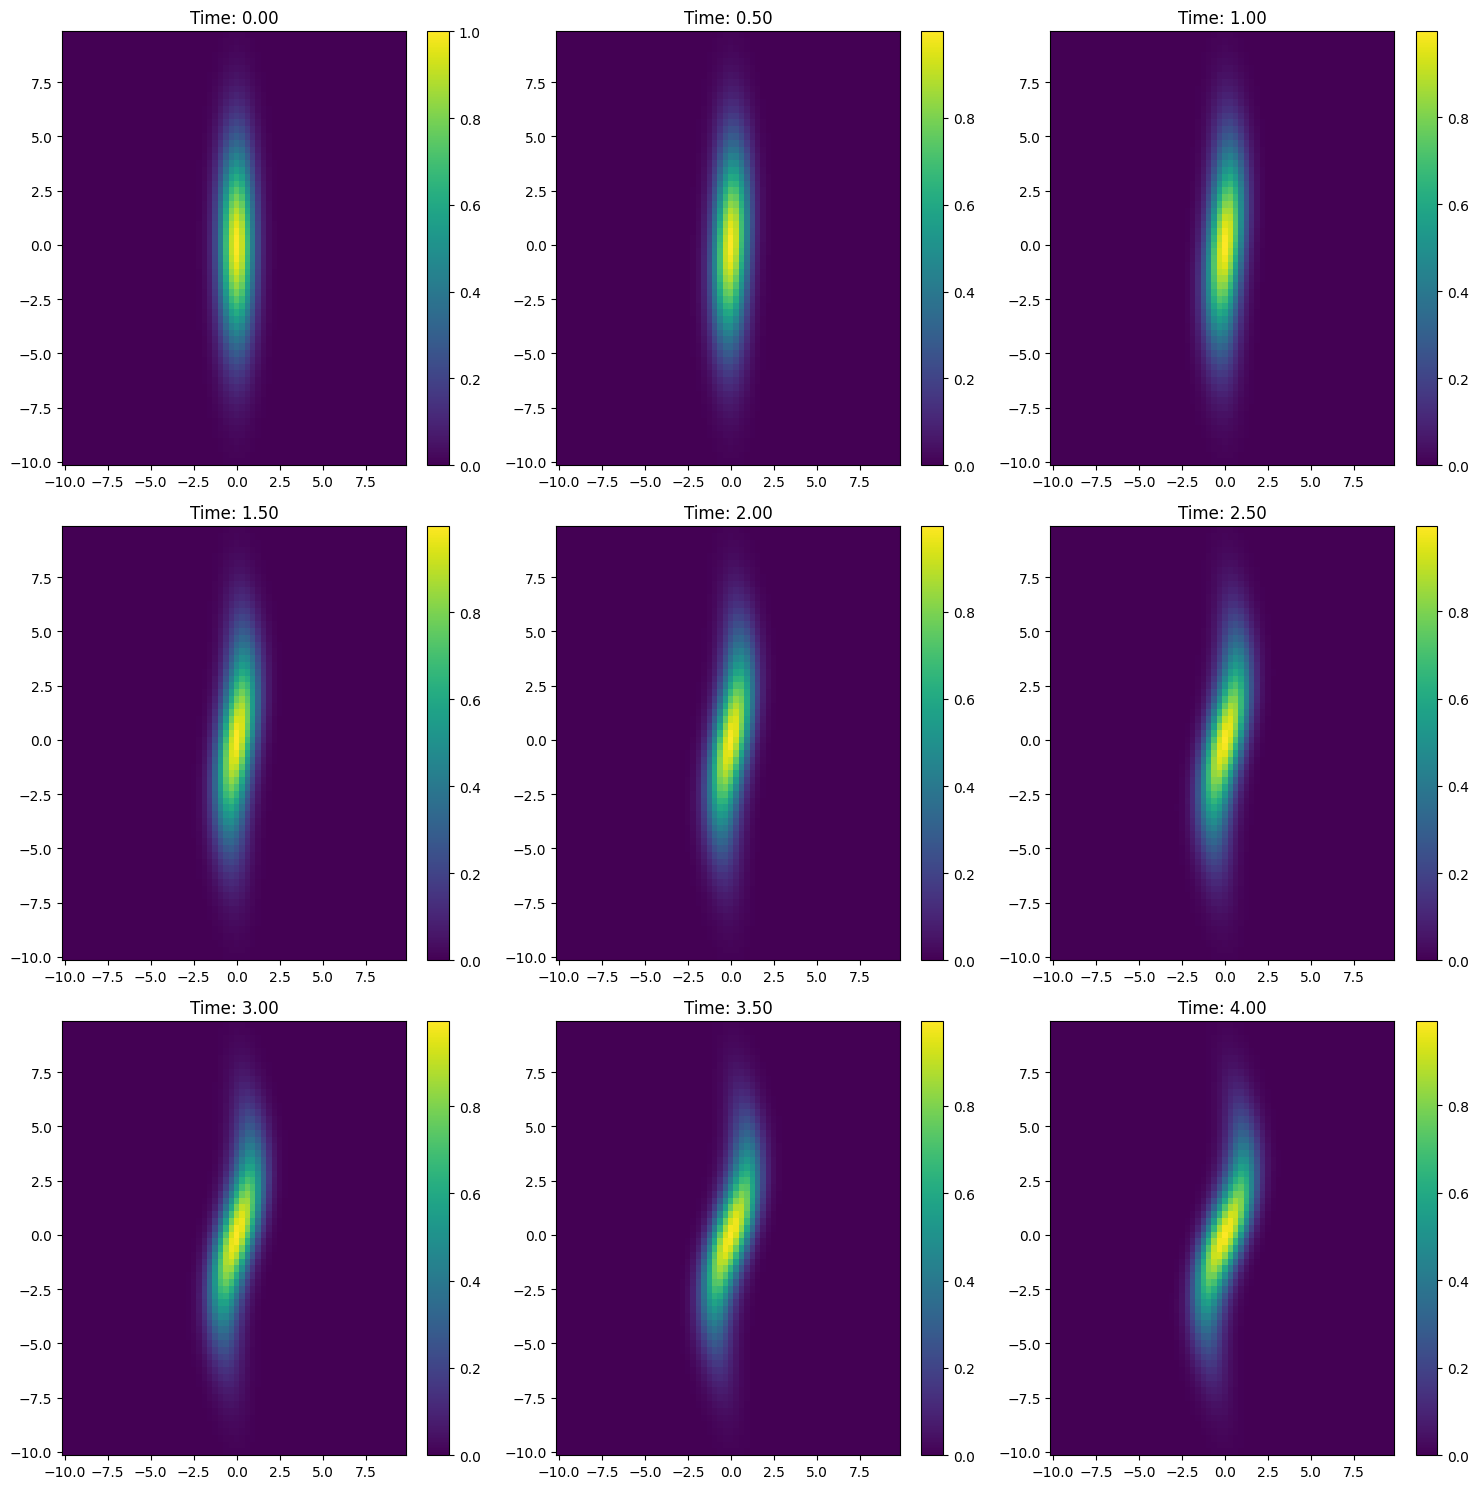

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2
from scipy.integrate import solve_ivp

# Define parameters
tspan = np.arange(0, 4 + 0.5, 0.5)
nu = 0.001
Lx, Ly = 20, 20
nx, ny = 64, 64
N = nx * ny

# Define spatial domain and initial conditions
x2 = np.linspace(-Lx/2, Lx/2, nx + 1)
x = x2[:nx]
y2 = np.linspace(-Ly/2, Ly/2, ny + 1)
y = y2[:ny]
X, Y = np.meshgrid(x, y)
w = 1*np.exp(-(X**2) - (Y**2)/20)

# Define spectral k values
kx = (2 * np.pi / Lx) * np.concatenate((np.arange(0, nx/2), np.arange(-nx/2, 0)))
kx[0] = 1e-6
ky = (2 * np.pi / Ly) * np.concatenate((np.arange(0, ny/2), np.arange(-ny/2, 0)))
ky[0] = 1e-6
KX, KY = np.meshgrid(kx, ky)
K = KX**2 + KY**2

def spc_rhs(t, wt2, nx, ny, N, KX, KY, K, nu, A, B, C):
    
    wt = wt2.reshape((nx, ny))
    wtfft = fft2(wt)
    psix = np.real(ifft2(-wtfft / K)).flatten()
    rhs = (nu * (A @ wt2) + (B @ wt2) * (C @ psix) - (B @ psix) * (C @ wt2))
    
    return rhs

# Solve the ODE
w = w.flatten()
print(w)


sol = solve_ivp(spc_rhs, t_span=[0, 4],y0=w,t_eval=tspan,method='RK45',args=(nx, ny, N, KX, KY, K, nu ,A,B,C))
A1 = sol.y.T
print(A1)
print(A1.shape)

# Solve ODE
#sol = solve_ivp(spc_rhs,t_span=[0, 4],y0=w,t_eval=tspan,method='RK45')

# Reshape solution
solution_real = sol.y.T.reshape(-1, nx, ny)

# Plot results
n_plots = len(tspan)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))

for j, t in enumerate(tspan):
    plt.subplot(n_rows, n_cols, j + 1)
    plt.pcolormesh(X, Y, solution_real[j], shading='auto', cmap='viridis')
    plt.title(f'Time: {t:.2f}')
    plt.colorbar()

plt.tight_layout()
plt.show()

In [4]:
KX

array([[ 1.00000000e-06,  3.14159265e-01,  6.28318531e-01, ...,
        -9.42477796e-01, -6.28318531e-01, -3.14159265e-01],
       [ 1.00000000e-06,  3.14159265e-01,  6.28318531e-01, ...,
        -9.42477796e-01, -6.28318531e-01, -3.14159265e-01],
       [ 1.00000000e-06,  3.14159265e-01,  6.28318531e-01, ...,
        -9.42477796e-01, -6.28318531e-01, -3.14159265e-01],
       ...,
       [ 1.00000000e-06,  3.14159265e-01,  6.28318531e-01, ...,
        -9.42477796e-01, -6.28318531e-01, -3.14159265e-01],
       [ 1.00000000e-06,  3.14159265e-01,  6.28318531e-01, ...,
        -9.42477796e-01, -6.28318531e-01, -3.14159265e-01],
       [ 1.00000000e-06,  3.14159265e-01,  6.28318531e-01, ...,
        -9.42477796e-01, -6.28318531e-01, -3.14159265e-01]])